# Introduction to Business Analytics



Participants:

- Elli Georgiou: s223408
- Maria Katarachia: s213633
- Stavroula Douva: s222652
- Michail-Achillefs Katarachias: s222653
- Dimitris Voukatas: s230148



# Table of Content
Section 1: **Introduction + Data Analysis \& Visualizations**<br> <br>
Section 2: **Prediction models**<br> <br>
Section 3: **Exploratory Component** <br> <br>
Section 4: **Conclusions**<br> <br>

# Section 1 : Introduction and Data Analysis and Visualizations

In this first section, we embark on the analysis of our dataframe, aiming to transform it into a higher-quality set that can provide meaningful insights for the subsequent phases of this project. The first crucial step involves preprocessing, which includes cleaning and organizing the dataset.

Cleaning is of paramount importance, encompassing tasks such as handling missing values, removing duplicates, and addressing outliers. These actions ensure that the data is reliable and free from errors, setting the foundation for robust analysis.

Following this approach, we filter the data based on relevant criteria. For instance, we seek data that adheres to logical parameters; for example, age should fall within a specific range, trip duration should follow a consistent format, and station locations must be within the boundaries of New York territory.

Once the data is cleaned and preprocessed, visualization emerges as a powerful tool for gaining initial insights. Visual representations, such as histograms, scatter plots, and correlation matrices, offer a holistic view, unveiling potential patterns, trends, or relationships throughout the dataset.

## Setup

Firstly, we import all the libraries that will be used in this project.

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#import torch
#import torch.nn as nn
#import torch.optim as optim
from time import time

import warnings
warnings.filterwarnings('ignore')
###

## Data importing

We open the file and create a folder for our plots as well.

In [133]:
file_path = 'Trips_2018.csv'


if not os.path.exists('plots'):
    os.makedirs('plots')

with open(file_path, 'r') as f:
    df = pd.read_csv(f)

In [3]:
import tqdm

ModuleNotFoundError: No module named 'tqdm'

# Data cleaning

Let's take a look at how our dataframe appears.

In [6]:
df.head()


,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [7]:
# We are checking the data types of our dataframe to see that are on the appropiate type and also the dimensions of our dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB


In [134]:
# We are dropping the first column because it is just an index.
df = df.drop(df.columns[0], axis=1)
#df = df.sample(n=1000000, random_state=42)

## Missing values

In [36]:
# We check if there are any null values in our dataframe.
df.isnull().sum()



tripduration                 0
starttime                    0
stoptime                     0
start_station_id           142
start_station_latitude       0
start_station_longitude      0
end_station_id             142
end_station_latitude         0
end_station_longitude        0
bikeid                       0
usertype                     0
birth_year                   0
gender                       0
dtype: int64

In [9]:
# # We also check that there are no duplicates.
# df.duplicated().sum()

0

In [135]:
# We remove null values for start_station_id and end_station_id.
df = df[pd.to_numeric(df['start_station_id'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['end_station_id'], errors='coerce').notnull()]



In [11]:
# One more time we check our dataframe.
df.tail(10)

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
1759180,519,2018-03-23 17:42:39.3140,2018-03-23 17:51:18.3160,341.0,40.717821,-73.976289,307.0,40.714275,-73.989900,30678,Subscriber,1967,1
16214309,112,2018-11-21 14:29:13.3650,2018-11-21 14:31:05.8160,3521.0,40.798786,-73.952300,3374.0,40.799484,-73.955613,20366,Subscriber,1973,1
6945200,683,2018-06-27 20:08:57.2800,2018-06-27 20:20:20.4380,3112.0,40.729060,-73.957790,3611.0,40.744907,-73.953457,30168,Subscriber,1984,1
17172788,245,2018-12-17 15:57:45.6360,2018-12-17 16:01:50.9930,3376.0,40.764719,-73.962221,3355.0,40.768009,-73.968453,35109,Subscriber,1981,1
10339506,405,2018-08-14 08:50:47.4350,2018-08-14 08:57:32.6650,331.0,40.711731,-73.991930,376.0,40.708621,-74.007222,18435,Subscriber,1956,2
12335486,2703,2018-09-14 19:56:04.6400,2018-09-14 20:41:08.4250,3294.0,40.783502,-73.955327,3543.0,40.810285,-73.957365,16781,Customer,1990,2
16847495,365,2018-12-08 17:58:09.5630,2018-12-08 18:04:14.7800,3160.0,40.778968,-73.973747,3171.0,40.785247,-73.976673,34006,Subscriber,1953,1
14565180,530,2018-10-19 08:00:41.1900,2018-10-19 08:09:31.5720,3345.0,40.789485,-73.952429,3154.0,40.773142,-73.958562,25136,Subscriber,1967,1
7721965,586,2018-07-25 18:06:53.8730,2018-07-25 18:16:40.1550,229.0,40.727434,-73.993790,229.0,40.727434,-73.993790,19225,Subscriber,1983,1
16794410,431,2018-12-07 09:57:35.8180,2018-12-07 10:04:47.4240,265.0,40.722293,-73.991475,248.0,40.721854,-74.007718,32187,Subscriber,1973,1


## Formating

After finishing the first stage of clearance, we want to have the right format for our time objects before proceeding with more processing afterward.

In [136]:
# Convert start_time and end_time columns to datetime format.
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Extract date, hour, and day of the week from start_time column.
df['date'] = df['starttime'].dt.date
df['hour'] = df['starttime'].dt.hour
df['day_of_week'] = df['starttime'].dt.dayofweek

## Filtering

In [137]:
# Drop any rows with negative trip durations.
df = df[df['tripduration'] > 0]

# Drop any rows with trip durations greater than 24 hours.
df = df[df['tripduration'] <= 86400]

# Drop rows that are outside the 99th percentile of trip durations.
df = df[df['tripduration'] <= df['tripduration'].quantile(.99)]

# Drop rows where the birth_year is outside the lower 99th percentile of birth years.
df = df[df['birth_year'] >= df['birth_year'].quantile(.01)]

# Drop rows where the gender is not 0, 1 or 2.
df = df[df['gender'].isin([0, 1, 2])]


In [14]:
# We observe the statistics of our dataframe.
df.describe()


,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,hour,day_of_week
count,980071.000000,980071.000000,980071.000000,980071.000000,980071.000000,980071.000000,980071.000000,980071.000000,980071.000000,980071.000000,980071.000000,980071.000000
mean,776.621550,1584.809533,40.737220,-73.982649,1575.767097,40.736911,-73.982869,26573.042145,1979.401391,1.152464,13.887942,2.839452
std,574.298332,1438.590918,0.032326,0.019102,1437.906293,0.032108,0.019153,6220.903761,11.343825,0.540079,4.861672,1.926928
min,61.000000,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.055701,14529.000000,1950.000000,0.000000,0.000000,0.000000
25%,357.000000,380.000000,40.717548,-73.995209,380.000000,40.717548,-73.995951,20310.000000,1969.000000,1.000000,10.000000,1.000000
50%,599.000000,505.000000,40.738177,-73.985649,504.000000,40.737561,-73.986317,28284.000000,1982.000000,1.000000,15.000000,3.000000
75%,1041.000000,3244.000000,40.757570,-73.972826,3244.000000,40.757148,-73.973442,31885.000000,1989.000000,1.000000,18.000000,4.000000
max,3468.000000,3721.000000,45.506364,-73.568906,3721.000000,45.506364,-73.568906,35806.000000,2002.000000,2.000000,23.000000,6.000000


# Visualizations

We visualize our data to gain useful insights.

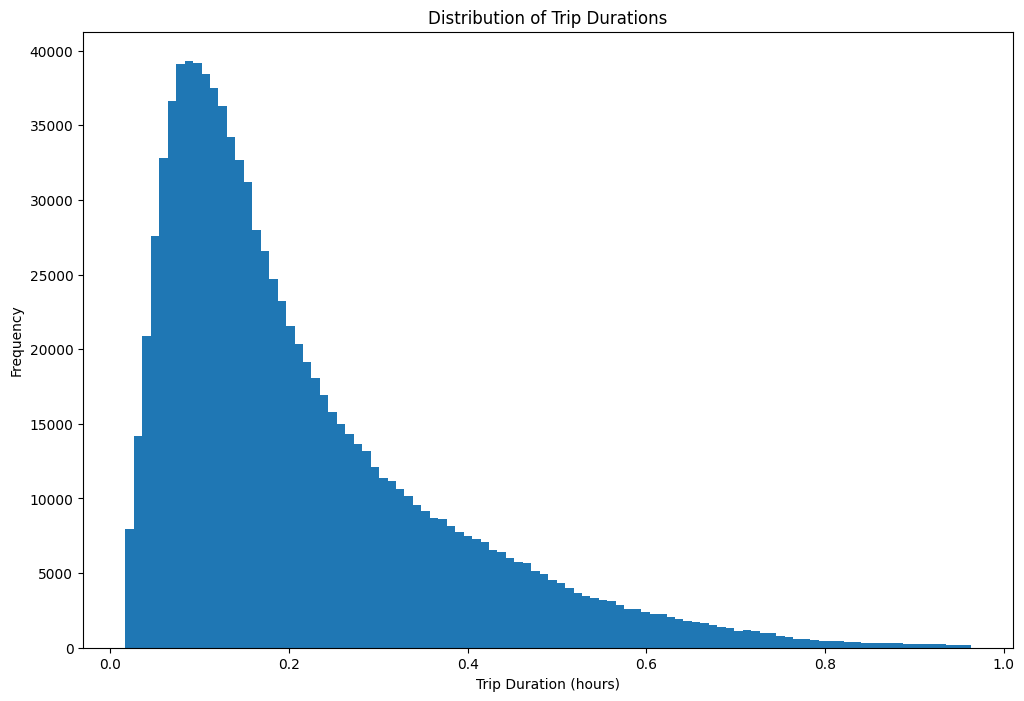

In [15]:
# Distribution of trip durations
plt.figure(figsize=(12, 8))
plt.hist(df['tripduration']/3600, bins=100)
plt.xlabel('Trip Duration (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.savefig(os.path.join('plots', 'trip_duration_distribution.png'))
plt.show()


We are checking the age of our users, and it seems that our customers are within a reasonable age range.

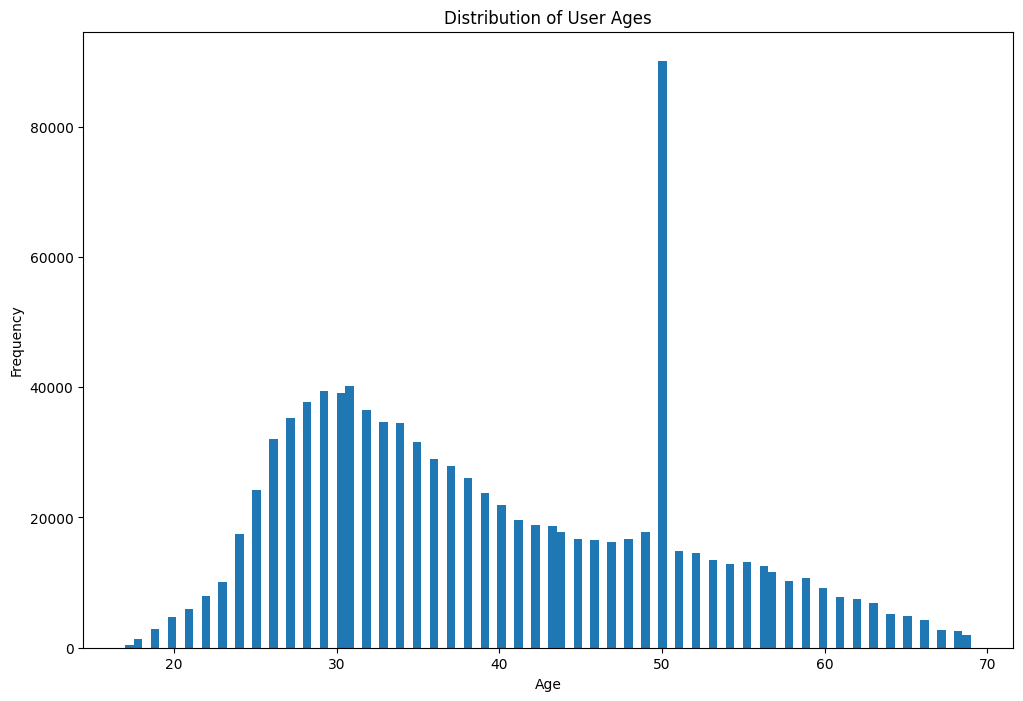

In [16]:
# Age distribution of the users.
plt.figure(figsize=(12, 8))
plt.hist(2019 - df['birth_year'], bins=100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of User Ages')
plt.savefig(os.path.join('plots', 'age_distribution.png'))
plt.show()


We want to observe the gender distrubution as well.

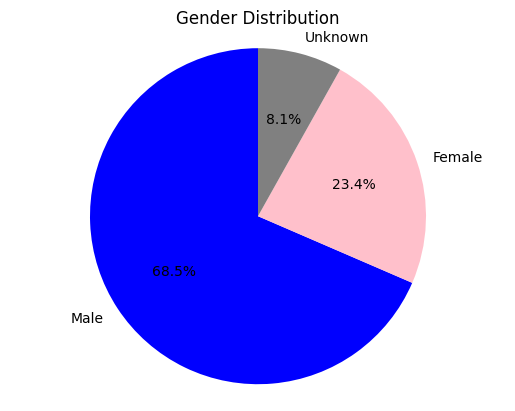

In [17]:
gender_counts = df['gender'].value_counts()

gender_counts

labels = ['Male', 'Female', 'Unknown']
colors = ['blue', 'pink', 'gray']

fig = plt.figure(facecolor='white')
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Gender Distribution')
plt.show()

This marks the completion of the first stage. Now, we have our dataframe in the right format, ready to examine clustering and implement prediction models.

# Descriptive study

## Clustering

After cleaning the data we are procceding with the second step.
We apply PCA method to gain insights about the correlation of our features.

In [138]:
df['tripduration'] = (df['stoptime'] - df['starttime']).dt.total_seconds()


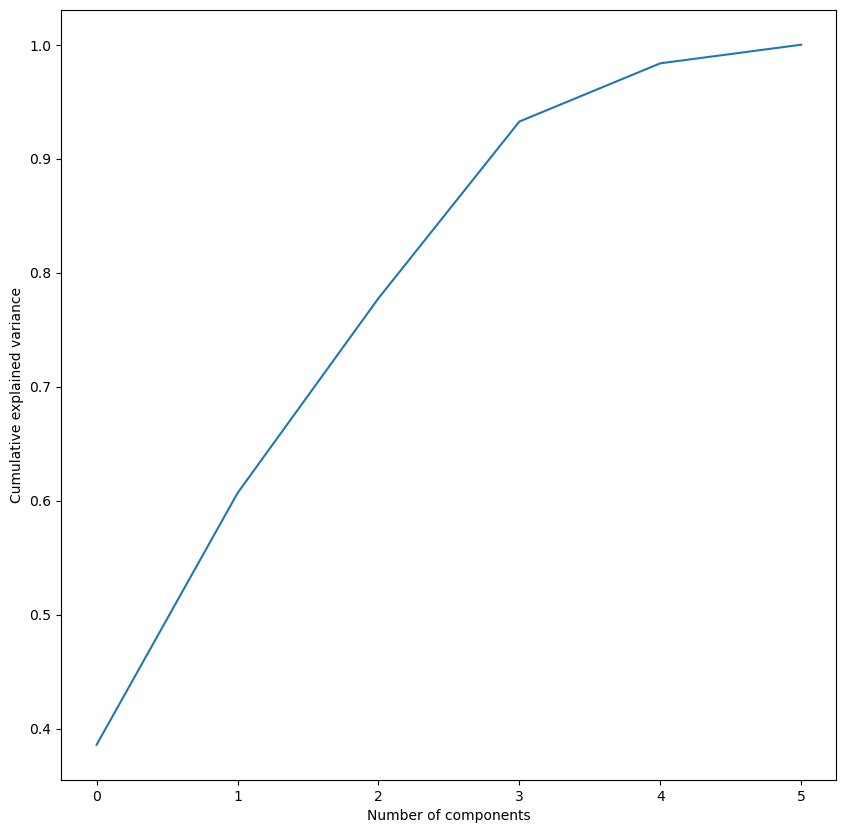


Principal Component 1 Loadings:
end_station_latitude       0.541727
start_station_latitude     0.540553
start_station_longitude    0.454756
end_station_longitude      0.454349
tripduration               0.031408
birth_year                -0.010569
Name: 0, dtype: float64

Principal Component 2 Loadings:
start_station_latitude     0.420023
end_station_latitude       0.417211
tripduration               0.156639
birth_year                -0.331099
start_station_longitude   -0.507287
end_station_longitude     -0.507951
Name: 1, dtype: float64

Principal Component 3 Loadings:
birth_year                 0.527267
end_station_latitude       0.162994
start_station_latitude     0.161146
end_station_longitude     -0.158991
start_station_longitude   -0.160297
tripduration              -0.786436
Name: 2, dtype: float64

Principal Component 4 Loadings:
birth_year                 0.782461
tripduration               0.596639
start_station_latitude     0.077548
end_station_latitude       0.072920
star

In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year', 'tripduration']])
scaled_df = pd.DataFrame(scaled_df, columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year', 'tripduration'])

# PCA using all the features
pca = PCA(n_components=6)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)
pca_df = pd.DataFrame(pca.components_, columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'birth_year', 'tripduration'])


plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.savefig(os.path.join('plots', 'pca_cumulative_explained_variance.png'))
plt.show()

corr_matrix = scaled_df.corr()
corr_matrix['tripduration'].sort_values(ascending=False)

# Print the loadings for each principal component
for i in range(len(pca_df)):
    print(f"\nPrincipal Component {i + 1} Loadings:")
    print(pca_df.iloc[i].sort_values(ascending=False))


It seems that the start_station_latitude , end_station_longitude  contain plethora of information for our problem.       

# Elbow method

In order to identify the optimal number of clusters for the clustering algorithm we chose the elbow method.

100%|██████████| 39/39 [11:24<00:00, 17.54s/it]


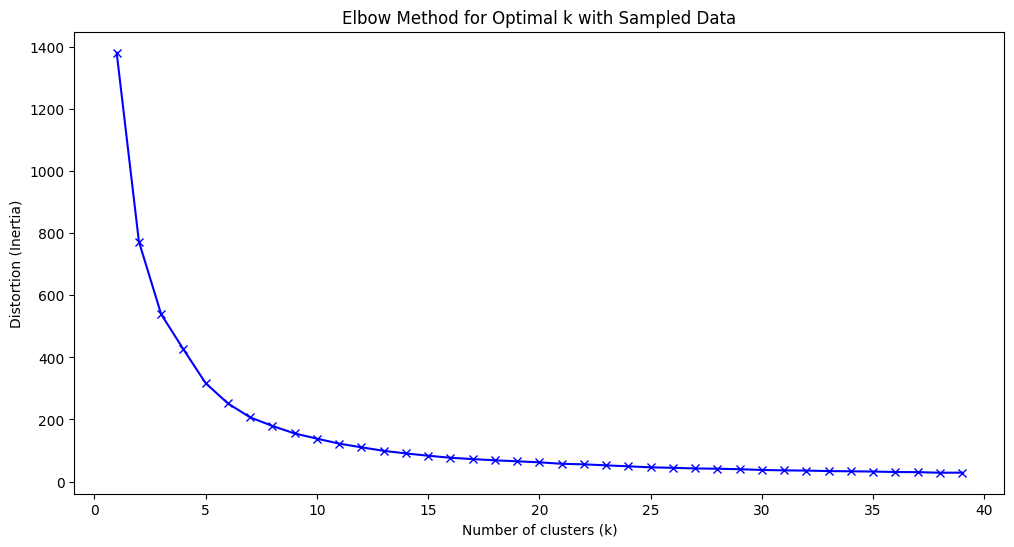

In [21]:
from tqdm import tqdm
# Extract coordinates from the sample
coordinates_sample = df[['start_station_latitude', 'start_station_longitude']]

#Standardize the coordinates
# scaler = StandardScaler()
# coordinates_standardized = scaler.fit_transform(coordinates_sample)
# coordinates_sample = coordinates_standardized

#Elbow method
distortions = []
K = range(1, 40)
for k in tqdm(K):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coordinates_sample)
    distortions.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(12, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k with Sampled Data')
plt.show()


Further processing with K-means clustering to remove locations we don't care about.

In [ ]:
# from sklearn.cluster import KMeans
# # from sklearn.preprocessing import StandardScaler  # Optional

# # Extract start and end coordinates
# coordinates_start = df[['start_station_latitude', 'start_station_longitude']]
# coordinates_end = df[['end_station_latitude', 'end_station_longitude']]

# # Combine data1 and data2
# combined_data = pd.concat([coordinates_start, coordinates_end], ignore_index=True)

# # Standardize the coordinates (optional)
# # scaler = StandardScaler()
# # coordinates_standardized = scaler.fit_transform(combined_data)
# # Use coordinates_standardized for clustering if standardization is applied

# # Fit K-means
# optimal_clusters = 20
# kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
# # If standardizing: cluster_labels = kmeans.fit_predict(coordinates_standardized)
# cluster_labels = kmeans.fit_predict(combined_data)

# # Assign cluster labels back to the original DataFrame
# # This step depends on how you want to analyze the clusters in your original data
# df['start_station_cluster'] = kmeans.predict(coordinates_start)
# df['end_station_cluster'] = kmeans.predict(coordinates_end)

# # Get the cluster centers
# centers = kmeans.cluster_centers_

# # Add the cluster labels to the dataframe
# df['cluster'] = kmeans.predict(combined_data)
# # Optionally convert the cluster centers back to the original scale
# # centers_original_scale = scaler.inverse_transform(centers)  # If standardization is applied


In [139]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extract coordinates from the sample
coordinates_start = df[['start_station_latitude', 'start_station_longitude']]
coordinates_end = df[['end_station_latitude', 'end_station_longitude']]

#Standardize the coordinates
# scaler = StandardScaler()
# coordinates_standardized = scaler.fit_transform(coordinates_start)

# Plot K-means with 35 clusters
kmeans = KMeans(n_clusters=25, random_state=42)
kmeans.fit(coordinates_start)
df['cluster'] = kmeans.predict(coordinates_start)

# Cluster the data into 20 clusters
kmeans = KMeans(n_clusters=20, init='k-means++', random_state=42).fit(coordinates_start)

# Get the cluster centers
centers = kmeans.cluster_centers_

# Add the cluster labels to the dataframe
df['cluster'] = kmeans.predict(coordinates_start)

Plot the clusters on a map.

In [10]:
import plotly.express as px

def plot_stations_map(stations):
    #First before plotting we have to deal with the outliers
    #The latitude of New York City is approximately between 40.4774 and 45.01585, and the longitude is approximately between -79.76259 and -71.18507.

    lon_min = -79.76259
    lat_min = 40.4774
    lon_max = -71.18507
    lat_max = 45.01585

    # Store the stations that are within the boundaries
    stations = stations[
        (stations['start_station_latitude'] > lat_min) &
        (stations['start_station_latitude'] < lat_max) &
        (stations['start_station_longitude'] > lon_min) &
        (stations['start_station_longitude'] < lon_max)
    ]

    #Plot the stations with an underlying map of New York City
    title = 'Citi Bike Stations in New York City'
    fig = px.scatter_mapbox(
        stations,
        lat='start_station_latitude',
        lon='start_station_longitude',
        color='cluster',
        mapbox_style='carto-positron',
        zoom=9,
        width=1000,
        height=600
    )
    fig.update_layout(
        title=dict(
            text=title,
            x=0.5,  # Center the title horizontally
            xanchor='center',  # Anchor point for horizontal alignment
            font=dict(size=20)
        )
    )
    fig.show()


Remove the locations that are more than 3 standard deviations from the center of the clusters.

In [121]:
# Calculate the distance between each point and its cluster center
distance = kmeans.transform(coordinates_start)

# Get the minimum distance for each point and its cluster index
min_distance = np.min(distance, axis=1)
min_distance_cluster = np.argmin(distance, axis=1)

threshold = 2*np.std(distance,axis=1)

# Get the indices of the points that are within the threshold distance of a cluster center
within_threshold = np.argwhere(min_distance < threshold).flatten()

# Remove the points that are outside the threshold distance of a cluster center
df = df.iloc[within_threshold]

# Plot the stations with an underlying map of New York City.
#plot_stations_map(df)
##gb

Find the most important cluster and get all the relevant values from the dataframe based on it (MVC - Most Valuable Cluster).

In [103]:
df

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,date,hour,day_of_week,cluster
16303534,882.698,2018-11-25 18:21:38.774,2018-11-25 18:36:21.472,423.0,40.765849,-73.986905,476.0,40.743943,-73.979661,20049,Customer,1969,0,2018-11-25,18,6,9
10311866,669.424,2018-08-13 18:25:50.544,2018-08-13 18:36:59.968,3467.0,40.724947,-74.001659,327.0,40.715338,-74.016584,33847,Subscriber,1987,1,2018-08-13,18,0,10
17229606,521.955,2018-12-18 20:12:15.062,2018-12-18 20:20:57.017,411.0,40.722281,-73.976687,504.0,40.732219,-73.981656,30284,Subscriber,1971,1,2018-12-18,20,1,26
4463430,270.386,2018-05-18 14:23:52.105,2018-05-18 14:28:22.491,437.0,40.680983,-73.950048,3047.0,40.682369,-73.944118,31542,Subscriber,1964,1,2018-05-18,14,4,12
10376436,441.185,2018-08-14 19:00:15.867,2018-08-14 19:07:37.052,519.0,40.751873,-73.977706,498.0,40.748549,-73.988084,18363,Subscriber,1979,1,2018-08-14,19,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335486,2703.785,2018-09-14 19:56:04.640,2018-09-14 20:41:08.425,3294.0,40.783502,-73.955327,3543.0,40.810285,-73.957365,16781,Customer,1990,2,2018-09-14,19,4,32
16847495,365.217,2018-12-08 17:58:09.563,2018-12-08 18:04:14.780,3160.0,40.778968,-73.973747,3171.0,40.785247,-73.976673,34006,Subscriber,1953,1,2018-12-08,17,5,20
14565180,530.382,2018-10-19 08:00:41.190,2018-10-19 08:09:31.572,3345.0,40.789485,-73.952429,3154.0,40.773142,-73.958562,25136,Subscriber,1967,1,2018-10-19,8,4,13
7721965,586.282,2018-07-25 18:06:53.873,2018-07-25 18:16:40.155,229.0,40.727434,-73.993790,229.0,40.727434,-73.993790,19225,Subscriber,1983,1,2018-07-25,18,2,18


After identifying clusters based on departure stations, the next step is to determine which cluster exhibits the largest demand in terms of the number of pickups.

In [140]:
# We work with the cluster with the largest demand.

larg_cluster = df['cluster'].value_counts().index[0]

df_cluster = df[df['cluster'] == larg_cluster]

# We want to create two timeseries that will describe for hourly intervals the pick up and the dropoffs counts for the one cluster with the largest demand.

df_cluster

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,date,hour,day_of_week,cluster
25124,470.506,2018-01-02 07:13:39.016,2018-01-02 07:21:29.522,173.0,40.760683,-73.984527,508.0,40.763414,-73.996674,31851,Subscriber,1969,0,2018-01-02,7,1,10
25125,388.682,2018-01-02 07:58:59.041,2018-01-02 08:05:27.723,173.0,40.760683,-73.984527,228.0,40.754601,-73.971879,27497,Subscriber,1978,1,2018-01-02,7,1,10
25126,375.736,2018-01-02 07:59:59.967,2018-01-02 08:06:15.703,173.0,40.760683,-73.984527,379.0,40.749156,-73.991600,32080,Subscriber,1987,1,2018-01-02,7,1,10
25127,2563.643,2018-01-02 08:18:32.430,2018-01-02 09:01:16.073,173.0,40.760683,-73.984527,173.0,40.760683,-73.984527,29942,Subscriber,1962,1,2018-01-02,8,1,10
25128,674.345,2018-01-02 08:45:02.120,2018-01-02 08:56:16.465,173.0,40.760683,-73.984527,3223.0,40.758997,-73.968654,26711,Subscriber,1977,1,2018-01-02,8,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548278,794.864,2018-12-31 23:08:37.580,2018-12-31 23:21:52.444,450.0,40.762272,-73.987882,505.0,40.749013,-73.988484,32091,Subscriber,1988,1,2018-12-31,23,0,10
17548296,631.940,2018-12-31 23:20:08.627,2018-12-31 23:30:40.567,498.0,40.748549,-73.988084,480.0,40.766697,-73.990617,32898,Subscriber,1986,1,2018-12-31,23,0,10
17548320,1161.939,2018-12-31 23:38:29.436,2018-12-31 23:57:51.375,495.0,40.762699,-73.993012,281.0,40.764397,-73.973715,16078,Subscriber,1969,0,2018-12-31,23,0,10
17548321,1015.965,2018-12-31 23:39:10.727,2018-12-31 23:56:06.692,379.0,40.749156,-73.991600,301.0,40.722174,-73.983688,34170,Subscriber,1985,1,2018-12-31,23,0,10


In [141]:
# Data preproccesing we keep only theccolumns we need
columns_to_remove = ['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude','end_station_longitude','bikeid','day_of_week','usertype','birth_year','gender']
df_cluster = df_cluster.drop(columns=columns_to_remove, axis=1)


In [61]:
df_cluster

,tripduration,starttime,stoptime,date,hour,cluster
6605124,546.180,2018-06-15 14:43:39.614,2018-06-15 14:52:45.794,2018-06-15,14,18
10882812,2105.335,2018-08-22 16:36:20.666,2018-08-22 17:11:26.001,2018-08-22,16,18
10519120,749.808,2018-08-16 18:56:21.204,2018-08-16 19:08:51.012,2018-08-16,18,18
9079209,345.960,2018-07-05 08:57:45.723,2018-07-05 09:03:31.683,2018-07-05,8,18
6600562,1478.880,2018-06-04 16:08:24.787,2018-06-04 16:33:03.667,2018-06-04,16,18
...,...,...,...,...,...,...
16903225,492.225,2018-12-10 15:19:08.941,2018-12-10 15:27:21.166,2018-12-10,15,18
1685391,308.372,2018-03-23 11:54:37.161,2018-03-23 11:59:45.533,2018-03-23,11,18
13634206,764.855,2018-10-04 09:48:20.659,2018-10-04 10:01:05.514,2018-10-04,9,18
5235718,1139.264,2018-05-03 23:37:09.195,2018-05-03 23:56:08.459,2018-05-03,23,18


# Pick up dataframe

In [142]:
# We order the elements of this dataframe based on the date.

df_cluster.sort_values(by = ['starttime'],inplace = True )
# We work on hourly intervals for pick ups
pickups = df_cluster.copy()
pickups.set_index('starttime', inplace=True)
hourly_pickups = pickups.resample('H').count()  # You can replace 'count' with other aggregation functions like 'sum', 'mean', etc.
columns_to_drop = ['tripduration', 'stoptime', 'date', 'cluster']
hourly_pickups = hourly_pickups.rename(columns={'hour': 'pickup_counts'})
hourly_pickups = hourly_pickups.drop(columns=columns_to_drop)
hourly_pickups

,pickup_counts
starttime,
2018-01-01 00:00:00,12
2018-01-01 01:00:00,16
2018-01-01 02:00:00,7
2018-01-01 03:00:00,9
2018-01-01 04:00:00,4
...,...
2018-12-31 19:00:00,7
2018-12-31 20:00:00,13
2018-12-31 21:00:00,9


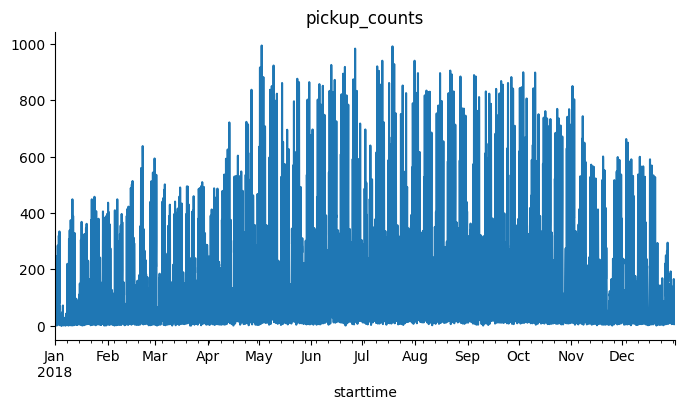

In [143]:
from matplotlib import pyplot as plt
hourly_pickups['pickup_counts'].plot(kind='line', figsize=(8, 4), title='pickup_counts')
plt.gca().spines[['top', 'right']].set_visible(False)

In [144]:

import plotly.express as px

fig = px.line(hourly_pickups, x=hourly_pickups.index, y='pickup_counts', title='Hourly Pickup Counts Time Series')

# Customize the layout if needed
fig.update_layout(
    xaxis_title='Datetime',
    yaxis_title='Pickup Counts',
    hovermode='x',  # Show hover information for all traces at the same x position
    template='plotly_dark'  # You can choose different templates, like 'plotly' or 'ggplot2'
)

# Show the plot
fig.show()


# Drop off dataframe


In [145]:
df_cluster['dropff_hour'] =df_cluster['stoptime'].dt.hour
df_cluster = df_cluster.rename(columns={'hour': 'pickup_hour'})
dropoff = df_cluster.copy()
dropoff





,tripduration,starttime,stoptime,date,pickup_hour,cluster,dropff_hour
338228,584.451,2018-01-01 00:20:13.291,2018-01-01 00:29:57.742,2018-01-01,0,10,0
459324,1267.237,2018-01-01 00:37:03.443,2018-01-01 00:58:10.680,2018-01-01,0,10,0
459323,1242.577,2018-01-01 00:37:03.586,2018-01-01 00:57:46.163,2018-01-01,0,10,0
459325,1223.156,2018-01-01 00:37:38.138,2018-01-01 00:58:01.294,2018-01-01,0,10,0
459326,1145.640,2018-01-01 00:38:23.924,2018-01-01 00:57:29.564,2018-01-01,0,10,0
...,...,...,...,...,...,...,...
17548278,794.864,2018-12-31 23:08:37.580,2018-12-31 23:21:52.444,2018-12-31,23,10,23
17548296,631.940,2018-12-31 23:20:08.627,2018-12-31 23:30:40.567,2018-12-31,23,10,23
17548320,1161.939,2018-12-31 23:38:29.436,2018-12-31 23:57:51.375,2018-12-31,23,10,23
17548321,1015.965,2018-12-31 23:39:10.727,2018-12-31 23:56:06.692,2018-12-31,23,10,23


In [146]:
columns_to_drop = ['tripduration', 'starttime', 'date', 'cluster','pickup_hour']
dropoff = dropoff.drop(columns=columns_to_drop)
dropoff

,stoptime,dropff_hour
338228,2018-01-01 00:29:57.742,0
459324,2018-01-01 00:58:10.680,0
459323,2018-01-01 00:57:46.163,0
459325,2018-01-01 00:58:01.294,0
459326,2018-01-01 00:57:29.564,0
...,...,...
17548278,2018-12-31 23:21:52.444,23
17548296,2018-12-31 23:30:40.567,23
17548320,2018-12-31 23:57:51.375,23
17548321,2018-12-31 23:56:06.692,23


In [147]:
dropoff.set_index('stoptime', inplace=True)
hourly_dropoff = dropoff.resample('H').count()
hourly_dropoff = hourly_dropoff.rename(columns={'dropff_hour': 'dropoff_counts'})
hourly_dropoff

,dropoff_counts
stoptime,
2018-01-01 00:00:00,7
2018-01-01 01:00:00,17
2018-01-01 02:00:00,10
2018-01-01 03:00:00,9
2018-01-01 04:00:00,5
...,...
2018-12-31 19:00:00,13
2018-12-31 20:00:00,13
2018-12-31 21:00:00,7


In [148]:
import plotly.express as px

fig = px.line(hourly_dropoff, x=hourly_dropoff.index, y='dropoff_counts', title='Hourly Dropoff Counts Time Series')

# Customize the layout if needed
fig.update_layout(
    xaxis_title='Datetime',
    yaxis_title='Dropoff Counts',
    hovermode='x',  # Show hover information for all traces at the same x position
    template='plotly_dark'  # You can choose different templates, like 'plotly' or 'ggplot2'
)

# Show the plot
fig.show()

In [161]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime

# Assuming hourly_pickups and hourly_dropoffs are your DataFrames

# Create lagged features
def create_lagged_features(df, lag_hours_list):
    for lag_hours in lag_hours_list:
        lag_name = f'lag_{lag_hours}hr'
        df[lag_name] = df.iloc[:, 0].shift(lag_hours)  # Assuming the count is the first column
    return df.dropna()

# Apply lagged features
#lag_hours_list = [1, 24, 168]  # 1 hour, 1 day, 1 week
lag_hours_list = [24]  # only for the day before

hourly_pickups = create_lagged_features(hourly_pickups, lag_hours_list)
hourly_dropoff = create_lagged_features(hourly_dropoff, lag_hours_list)

# Define a function to fit and evaluate the model
def fit_and_evaluate(df, target_col, split_date):
    split_date = pd.to_datetime(split_date)
    train = df[df.index < split_date]
    test = df[df.index >= split_date]

    X_train = train.drop(target_col, axis=1)
    y_train = train[target_col]
    X_test = test.drop(target_col, axis=1)
    y_test = test[target_col]

    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    return r2

# Evaluate models
split_date = '2018-11-01'  # Adjust this date as per your dataset
r2_pickups = fit_and_evaluate(hourly_pickups, 'pickup_counts', split_date)
r2_dropoff = fit_and_evaluate(hourly_dropoff, 'dropoff_counts', split_date)

print(f"R² Score for Pickups: {r2_pickups}")
print(f"R² Score for Dropoffs:{r2_dropoff}")

R² Score for Pickups: 0.7838225402666439
R² Score for Dropoffs:0.7861778703469275


In [156]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor

# Assuming hourly_pickups and hourly_dropoffs are your DataFrames

# Create lagged features
def create_lagged_features(df, lag_hours_list):
    for lag_hours in lag_hours_list:
        lag_name = f'lag_{lag_hours}hr'
        df[lag_name] = df.iloc[:, 0].shift(lag_hours)  # Assuming the count is the first column
    return df.dropna()

# Apply lagged features
lag_hours_list = [1, 24, 168]  # 1 hour, 1 day, 1 week
hourly_pickups = create_lagged_features(hourly_pickups, lag_hours_list)
hourly_dropoff = create_lagged_features(hourly_dropoff, lag_hours_list)

# Define a function to fit and evaluate the model
def fit_and_evaluate(df, target_col, split_date):
    split_date = pd.to_datetime(split_date)
    train = df[df.index < split_date]
    test = df[df.index >= split_date]

    X_train = train.drop(target_col, axis=1)
    y_train = train[target_col]
    X_test = test.drop(target_col, axis=1)
    y_test = test[target_col]

    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    return r2 

# Evaluate models
split_date = '2018-11-01'  # Adjust this date as per your dataset
r2_pickups = fit_and_evaluate(hourly_pickups, 'pickup_counts', split_date)
r2_dropoff = fit_and_evaluate(hourly_dropoff, 'dropoff_counts', split_date)

print(f"R² Score for Pickups: {r2_pickups}")
print(f"R² Score for Dropoffs: {r2_dropoff}")

R² Score for Pickups: 0.8770469970686823
R² Score for Dropoffs: 0.872816769188718


...............................new.............................................

In [ ]:
X_train 

In [ ]:
#lets make the index  column 

hourly_pickups.reset_index(inplace=True)

# and make this column in datetime format

hourly_pickups['starttime'] = pd.to_datetime(hourly_pickups['starttime'])


In [96]:
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from datetime import date
from sklearn.ensemble import RandomForestRegressor


def buildLaggedFeatures(s,columns, lag=1,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            new_dict['%s_lag%d' %(col_name,lag)]=s[col_name].shift(lag)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res


split_date = date(2018, 11, 1)

def fit_pickups(f):
    # Split dataset into training and test sets
    train = f[:split_date]
    test = f[split_date:]

    # Split features for training and test
    X_train = train.drop(['pickup_counts'], axis=1)
    y_train = train[['pickup_counts']]
    X_test = test.drop(['pickup_counts'], axis=1)
    y_test = test[['pickup_counts']]

    # Train model
    regr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    regr.fit(X_train, y_train)
    predictions = regr.predict(X_test)

    # Evaluate scores
    r2 = r2_score(y_test, predictions)
    print(f"R^2 Score: {r2}")
    print("-------------------------")


    return r2, X_train, y_train, X_test, y_test

# Add lagged features to model
f_lagged = hourly_pickups
r2_scores = []
for i in range(1,11):
    print(f"Lag by {i} days")
    f_lagged = buildLaggedFeatures(f_lagged, ['pickup_counts'], lag=24*i)
    # Train and evaluate model
    r2,X_train, y_train, X_test, y_test = fit_pickups(f_lagged)
    r2_scores.append(r2)

def fit_dropoffs(f):
    # Split dataset into training and test sets
    train = f[:split_date]
    test = f[split_date:]

    # Split features for training and test
    X_train = train.drop(['dropoff_counts'], axis=1)
    y_train = train[['dropoff_counts']]
    X_test = test.drop(['dropoff_counts'], axis=1)
    y_test = test[['dropoff_counts']]

    # Train model
    regr = (fit_intercept=False)
    regr.fit(X_train, y_train)
    predictions = regr.predict(X_test)

    # Evaluate scores
    r2 = r2_score(y_test, predictions)
    print(f"R^2 Score: {r2}")
    print("-------------------------")
    return r2

# Add lagged features to model
f_lagged = hourly_dropoff
r2_scores = []
for i in range(1,11):
    print(f"Lag by {i} days")
    f_lagged = buildLaggedFeatures(f_lagged, ['dropoff_counts'], lag=24*i)
    # Train and evaluate model
    r2 = fit_dropoffs(f_lagged)
    r2_scores.append(r2)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1381143600.py, line 82)

In [102]:
X_train.head()

,dropoff_counts_lag24,dropoff_counts_lag48,dropoff_counts_lag72,dropoff_counts_lag96,dropoff_counts_lag120,dropoff_counts_lag144,dropoff_counts_lag168,dropoff_counts_lag192,dropoff_counts_lag216,dropoff_counts_lag240
stoptime,,,,,,,,,,
2018-02-25 00:00:00,5.0,1.0,2.0,4.0,2.0,2.0,0.0,1.0,1.0,2.0
2018-02-25 01:00:00,1.0,1.0,2.0,3.0,0.0,0.0,2.0,0.0,3.0,0.0
2018-02-25 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
2018-02-25 03:00:00,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-02-25 04:00:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# Fitting Random Forest

# Split dataset into training and test sets
train = f_lagged[:split_date]
test = f_lagged[split_date:]

# Split features for training and test
X_train = train.drop(['dropoff_counts'], axis=1)
y_train = train[['dropoff_counts']]
X_test = test.drop(['dropoff_counts'], axis=1)
y_test = test[['dropoff_counts']]



from sklearn.ensemble import RandomForestRegressor

pickups_forest = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
pickups_forest.fit(X_train, y_train)

prediction_pickup_forest = pickups_forest.predict(X_test)
print('Random forest accuracy: ' + str(pickups_forest.score(X_test, y_test)))

Random forest accuracy: 0.5212447603178552


In [28]:
def build_lagged_features(df, columns, lag=1):
    """
    Create lagged features for time series data.
    """
    lagged_df = df.copy()
    for col_name in columns:
        for i in range(1, lag+1):
            lagged_df[f'{col_name}_lag_{i}'] = df[col_name].shift(i * 24)  # assuming hourly data
    return lagged_df.dropna()


In [29]:
def split_data(df, split_date):
    """
    Split the dataframe into training and testing sets based on a split date.
    """
    # Ensure split_date is a datetime object
    split_date = pd.to_datetime(split_date)

    train = df[df.index < split_date]
    test = df[df.index >= split_date]
    return train, test

In [30]:
def train_and_evaluate(train, test, target):
    """
    Train a linear regression model and evaluate its performance.
    """
    X_train = train.drop(target, axis=1)
    y_train = train[target]
    X_test = test.drop(target, axis=1)
    y_test = test[target]

    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    return r2, mse

In [31]:
from sklearn.linear_model import LinearRegression

split_date = (2018, 11, 1)
hourly_pickups1['datetime'] = pd.to_datetime(hourly_pickups1.index)
hourly_pickups1.set_index('datetime', inplace=True)

r2_scores = []
mse_scores = []
lags = range(1, 11)

for i in lags:
    print(f"Analyzing Lag by {i} days")
    lagged_data = build_lagged_features(hourly_pickups1, ['pickup_counts'], lag=i)
    train_set, test_set = split_data(lagged_data, split_date)
    r2, mse = train_and_evaluate(train_set, test_set, 'pickup_counts')

    r2_scores.append(r2)
    mse_scores.append(mse)
    print(f"R^2 Score: {r2}, MSE: {mse}")
    print("-------------------------")

NameError: name 'date' is not defined

In [65]:
split_date = date(2018, 11, 1)
hourly_dropoff['datetime'] = pd.to_datetime(hourly_dropoff.index)
hourly_dropoff.set_index('datetime', inplace=True)

r2_scores = []
mse_scores = []
lags = range(1, 11)

for i in lags:
    print(f"Analyzing Lag by {i} days")
    lagged_data = build_lagged_features(hourly_dropoff, ['dropoff_counts'], lag=i)
    train_set, test_set = split_data(lagged_data, split_date)
    r2, mse = train_and_evaluate(train_set, test_set, 'dropoff_counts')

    r2_scores.append(r2)
    mse_scores.append(mse)
    print(f"R^2 Score: {r2}, MSE: {mse}")
    print("-------------------------")

Analyzing Lag by 1 days
R^2 Score: 0.363349486489949, MSE: 41.41192624824948
-------------------------
Analyzing Lag by 2 days
R^2 Score: 0.4118711808009815, MSE: 38.255756915768664
-------------------------
Analyzing Lag by 3 days
R^2 Score: 0.4315094480970243, MSE: 36.978355170777704
-------------------------
Analyzing Lag by 4 days
R^2 Score: 0.45557391192429464, MSE: 35.41304456461127
-------------------------
Analyzing Lag by 5 days
R^2 Score: 0.47405999187966363, MSE: 34.21058864337074
-------------------------
Analyzing Lag by 6 days
R^2 Score: 0.5242533548736505, MSE: 30.94568301249547
-------------------------
Analyzing Lag by 7 days
R^2 Score: 0.5526540779189331, MSE: 29.09831365805352
-------------------------
Analyzing Lag by 8 days
R^2 Score: 0.5503365036892229, MSE: 29.24906389077768
-------------------------
Analyzing Lag by 9 days
R^2 Score: 0.5492797366392758, MSE: 29.31780295279888
-------------------------
Analyzing Lag by 10 days
R^2 Score: 0.5490406857766637, MSE: 

In [ ]:
# lets run now a random forest model 

# Train-test split
train_data, test_data = train_test_split(f_agg, test_size=0.2, random_state=42, shuffle=False)

# Prepare data for RandomForest pickups model
X_train = train_data.drop(['pickup_counts', 'dropoff_counts'], axis=1)
y_train = train_data['pickup_counts']
X_test = test_data.drop(['pickup_counts', 'dropoff_counts'], axis=1)
y_test = test_data['pickup_counts']

# Train and evaluate RandomForest for pickups
rf_pickups_model, rf_pickups_mse, rf_pickups_r2 = train_and_evaluate_rf(X_train, y_train, X_test, y_test)
print(f'RandomForest Pickups - MSE: {rf_pickups_mse}, R2: {rf_pickups_r2}')

# Prepare data for RandomForest dropoffs model
X_train = train_data.drop(['dropoff_counts', 'pickup_counts'], axis=1)
y_train = train_data['dropoff_counts']
X_test = test_data.drop(['dropoff_counts', 'pickup_counts'], axis=1)
y_test = test_data['dropoff_counts']

# Train and evaluate RandomForest for dropoffs
rf_dropoffs_model, rf_dropoffs_mse, rf_dropoffs_r2 = train_and_evaluate_rf(X_train, y_train, X_test, y_test)
print(f'RandomForest Dropoffs - MSE: {rf_dropoffs_mse}, R2: {rf_dropoffs_r2}')


















def train_and_evaluate_rf(X_train, y_train, X_test, y_test, n_estimators=100):
    """
    Trains a RandomForest regression model and evaluates its performance.
    """
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return model, mse, r2




## Predictions

We start with the linear Regression model for predicting the trip duration.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract the features
features = MVC[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'hour']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Use the most important cluster's features to fit a Linear Regression (LR) model
from sklearn.linear_model import LinearRegression

# Extract the target variable
target = MVC['tripduration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.25, random_state=42)

# Fit a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

error = y_test - y_pred

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Calculate the R^2
r2 = lr.score(X_test, y_test)
print('R^2:', r2)


RMSE: 491.7556743490566
R^2: 0.10324411950529466


For better understanding we plot the Linear Regression model results.

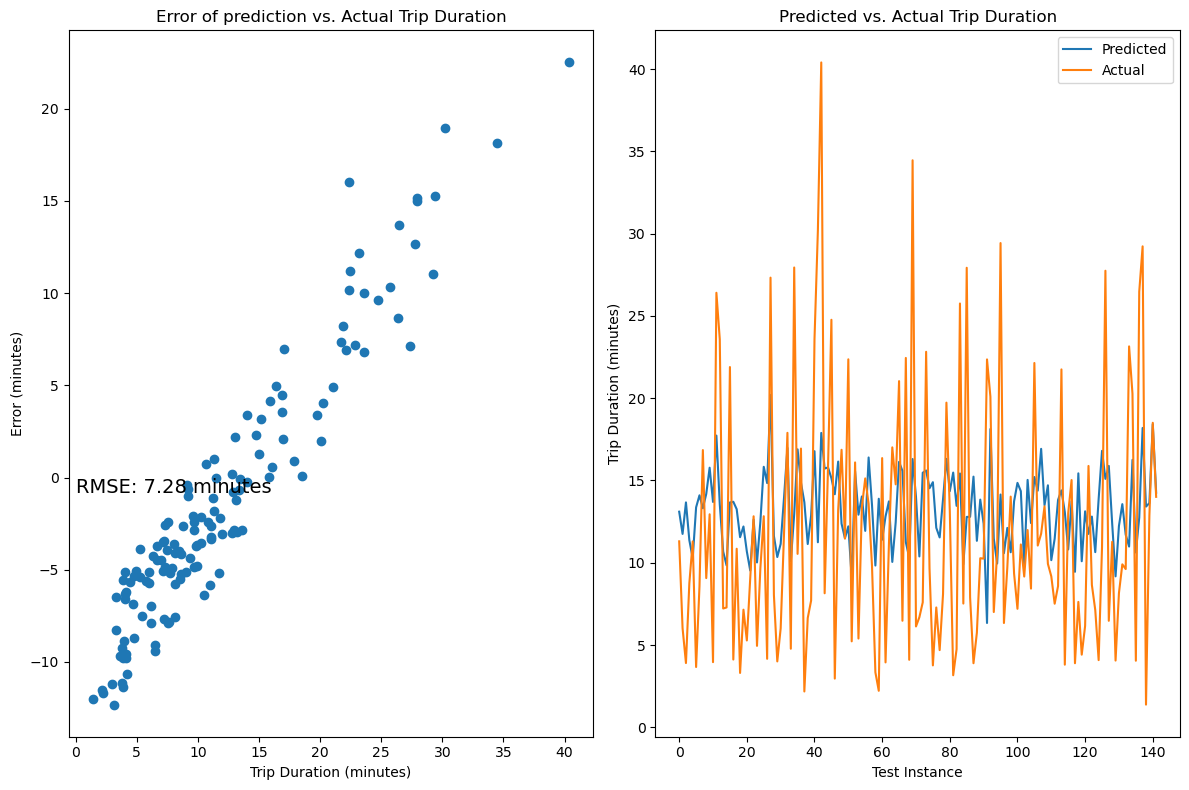

In [ ]:
# Plot the error
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.scatter(y_test/60, error/60)
plt.text(0, 0, 'RMSE: {:.2f} minutes'.format(rmse/60), fontsize=14, va='top')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Error (minutes)')
plt.title('Error of prediction vs. Actual Trip Duration')
plt.subplot(1, 2, 2)
plt.plot(y_pred/60, label='Predicted')
plt.plot(y_test.values/60, label='Actual')
plt.xlabel('Test Instance')
plt.ylabel('Trip Duration (minutes)')
plt.title('Predicted vs. Actual Trip Duration')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join('plots', 'linear_regression.png'))
plt.show()

A second appoach is utilized with a Random Forest model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fit a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Calculate the R^2
r2 = rf.score(X_test, y_test)
print('R^2:', r2)


RMSE: 373.5380326934527
R^2: 0.4825777171498091


Print the Random Forest model results.

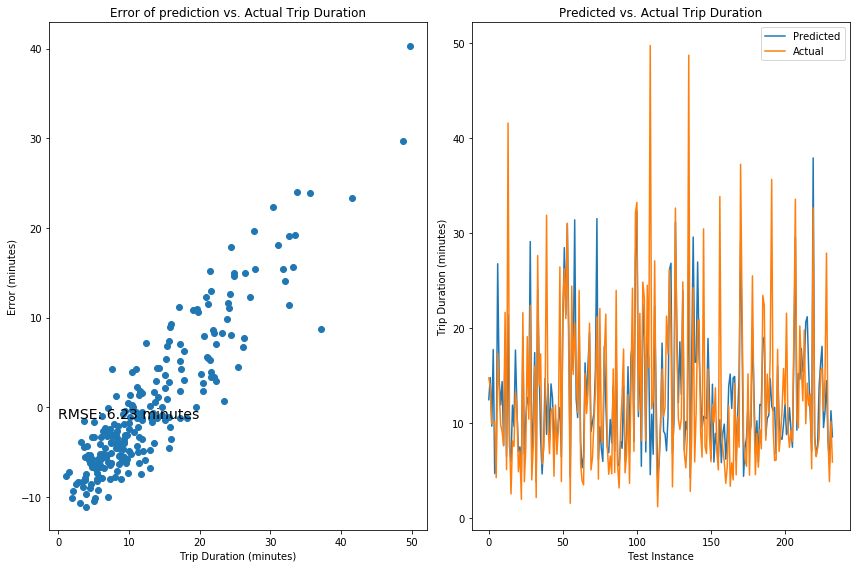

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.scatter(y_test/60, error/60)
plt.text(0, 0, 'RMSE: {:.2f} minutes'.format(rmse/60), fontsize=14, va='top')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Error (minutes)')
plt.title('Error of prediction vs. Actual Trip Duration')
plt.subplot(1, 2, 2)
plt.plot(y_pred/60, label='Predicted')
plt.plot(y_test.values/60, label='Actual')
plt.xlabel('Test Instance')
plt.ylabel('Trip Duration (minutes)')
plt.title('Predicted vs. Actual Trip Duration')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join('plots', 'random_forest.png'))
plt.show()


Implement Linear tranformation in a neural network

Epoch [10/3000], Loss: 880475.1250
Estimated remaining time: 0.19 minutes
Epoch [20/3000], Loss: 878609.0000
Estimated remaining time: 0.18 minutes


Epoch [30/3000], Loss: 875910.6875
Estimated remaining time: 0.19 minutes
Epoch [40/3000], Loss: 872071.1250
Estimated remaining time: 0.19 minutes
Epoch [50/3000], Loss: 866741.9375
Estimated remaining time: 0.18 minutes
Epoch [60/3000], Loss: 859546.1875
Estimated remaining time: 0.18 minutes
Epoch [70/3000], Loss: 850087.8750
Estimated remaining time: 0.19 minutes
Epoch [80/3000], Loss: 837963.6875
Estimated remaining time: 0.19 minutes
Epoch [90/3000], Loss: 822769.8125
Estimated remaining time: 0.19 minutes
Epoch [100/3000], Loss: 804085.2500
Estimated remaining time: 0.19 minutes
Epoch [110/3000], Loss: 781572.6250
Estimated remaining time: 0.18 minutes
Epoch [120/3000], Loss: 754934.8750
Estimated remaining time: 0.18 minutes
Epoch [130/3000], Loss: 724039.1250
Estimated remaining time: 0.18 minutes
Epoch [140/3000], Loss: 688938.6875
Estimated remaining time: 0.20 minutes
Epoch [150/3000], Loss: 649883.2500
Estimated remaining time: 0.20 minutes
Epoch [160/3000], Loss: 607339.

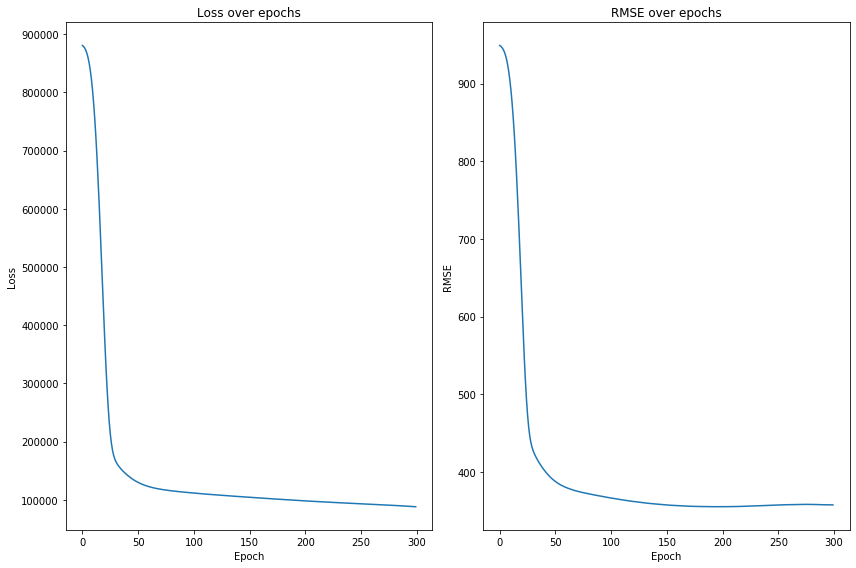

In [ ]:
# Extract the features
features = MVC[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'hour']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Extract the target variable
target = MVC['tripduration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.2, random_state=42)

# Check if there is a GPU available else run in CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

# Neural Network model
class RegressionModel(nn.Module):
    def __init__(self, input_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

model = RegressionModel(input_size=X_train.shape[1])

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Evaluation on the test set
def evaluate(model, X_test_tensor, y_test_tensor):
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
        rmse_nn = torch.sqrt(criterion(y_pred_tensor, y_test_tensor.view(-1, 1)))
        return rmse_nn

# Training the model
epochs = 3000 # Number of epochs
losses = [] # Keep track of the losses over time
rmse_array = []
start_time = time()
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
        losses.append(loss.item())
        rmse_nn = evaluate(model, X_test_tensor, y_test_tensor)
        rmse_array.append(rmse_nn.item())
        # Estimate the remaining time
        remaining_time = (time() - start_time) * (epochs - epoch) / (epoch + 1)
        print(f'Estimated remaining time: {remaining_time/60:.2f} minutes')

# Plot the loss over epochs
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.subplot(1,2,2)
plt.plot(rmse_array)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over epochs')
plt.tight_layout()
plt.savefig(os.path.join('plots', 'neural_network.png'))
plt.show()



In [ ]:
min_rmse = np.min(rmse_array)
print('Minimum possible RMSE:', min_rmse)

# Calculate the R^2
r2 = model.score(X_test_tensor, y_test_tensor)
print('R^2:', r2)




Minimum possible RMSE: 355.3008728027344


AttributeError: 'RegressionModel' object has no attribute 'score'

Create a NN with dropout layers

Epoch [10/2000], Loss: 881574.8125
RMSE: 949.8035
Estimated remaining time: 4.59 minutes
Epoch [20/2000], Loss: 881563.5625
RMSE: 949.8160
Estimated remaining time: 4.58 minutes
Epoch [30/2000], Loss: 881550.2500
RMSE: 949.8029
Estimated remaining time: 4.42 minutes
Epoch [40/2000], Loss: 881563.1250
RMSE: 949.8024
Estimated remaining time: 4.43 minutes
Epoch [50/2000], Loss: 881572.4375
RMSE: 949.8109
Estimated remaining time: 4.31 minutes
Epoch [60/2000], Loss: 881568.7500
RMSE: 949.7814
Estimated remaining time: 4.42 minutes
Epoch [70/2000], Loss: 881561.6250
RMSE: 949.7941
Estimated remaining time: 4.39 minutes
Epoch [80/2000], Loss: 881570.6250
RMSE: 949.7939
Estimated remaining time: 4.38 minutes
Epoch [90/2000], Loss: 881574.2500
RMSE: 949.7783
Estimated remaining time: 4.30 minutes
Epoch [100/2000], Loss: 881564.4375
RMSE: 949.8011
Estimated remaining time: 4.29 minutes
Epoch [110/2000], Loss: 881555.2500
RMSE: 949.7777
Estimated remaining time: 4.26 minutes
Epoch [120/2000], L

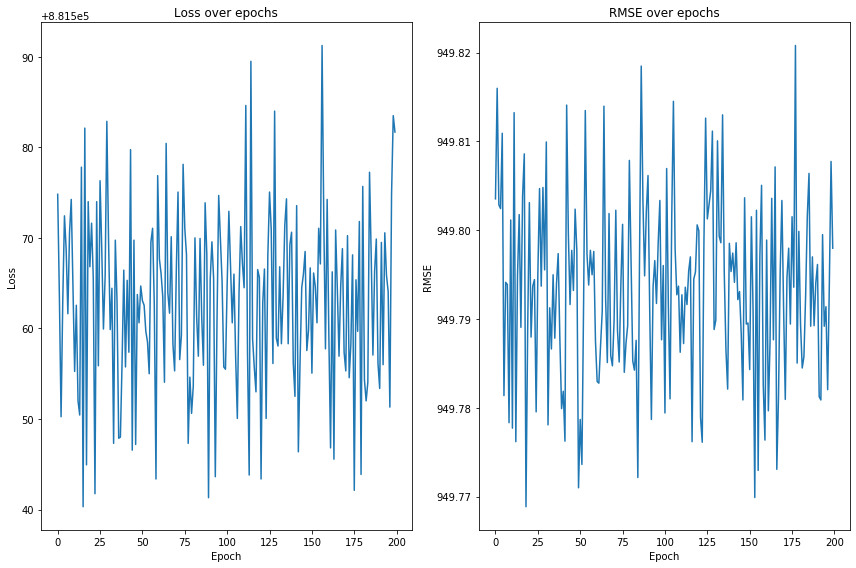

In [ ]:
# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Neural Network model with dropout
class EnhancedRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(EnhancedRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 2048)
        self.relu1 = nn.LeakyReLU(0.2)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(2048, 1024)
        self.relu2 = nn.LeakyReLU(0.2)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(1024, 512)
        self.relu3 = nn.LeakyReLU(0.2)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(512, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Evaluation on the test set
def evaluate(model, X_test_tensor, y_test_tensor):
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
        rmse_nn = torch.sqrt(criterion(y_pred_tensor, y_test_tensor.view(-1, 1)))
        return rmse_nn

# Training the model
epochs = 2000
losses = []  # Keep track of the losses over time
rmse_array = []
start_time = time()

model = EnhancedRegressionModel(input_size=X_train.shape[1])

for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 10 == 0:
        losses.append(loss.item())
        rmse_nn = evaluate(model, X_test_tensor, y_test_tensor)
        rmse_array.append(rmse_nn.item())
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
        print(f'RMSE: {rmse_nn.item():.4f}')
        print(f'Estimated remaining time: {(time() - start_time) * (epochs - epoch) / (epoch + 1)/60:.2f} minutes')

# Plot the loss over epochs
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.subplot(1, 2, 2)
plt.plot(rmse_array)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over epochs')
plt.tight_layout()
plt.savefig(os.path.join('plots', 'neural_network_dropout.png'))
plt.show()


Another model : LSTM model for predicting the trip duration (Mike's model)

Epoch [10/2000], Loss: 803978.0000
RMSE: 836.5095
Estimated remaining time: 1.67 minutes


Epoch [20/2000], Loss: 594253.0625
RMSE: 742.7735
Estimated remaining time: 1.63 minutes
Epoch [30/2000], Loss: 622402.9375
RMSE: 621.5584
Estimated remaining time: 1.72 minutes
Epoch [40/2000], Loss: 462236.1562
RMSE: 521.9565
Estimated remaining time: 1.58 minutes
Epoch [50/2000], Loss: 331945.2500
RMSE: 487.9136
Estimated remaining time: 1.62 minutes
Epoch [60/2000], Loss: 300702.0312
RMSE: 471.6250
Estimated remaining time: 1.54 minutes
Epoch [70/2000], Loss: 310916.5938
RMSE: 495.8111
Estimated remaining time: 1.54 minutes
Epoch [80/2000], Loss: 385637.6562
RMSE: 483.6770
Estimated remaining time: 1.54 minutes
Epoch [90/2000], Loss: 425031.3438
RMSE: 490.5226
Estimated remaining time: 1.56 minutes
Epoch [100/2000], Loss: 343726.7500
RMSE: 493.1094
Estimated remaining time: 1.54 minutes
Epoch [110/2000], Loss: 335454.8750
RMSE: 472.2828
Estimated remaining time: 1.50 minutes
Epoch [120/2000], Loss: 363417.8750
RMSE: 497.0228
Estimated remaining time: 1.47 minutes
Epoch [130/2000], 

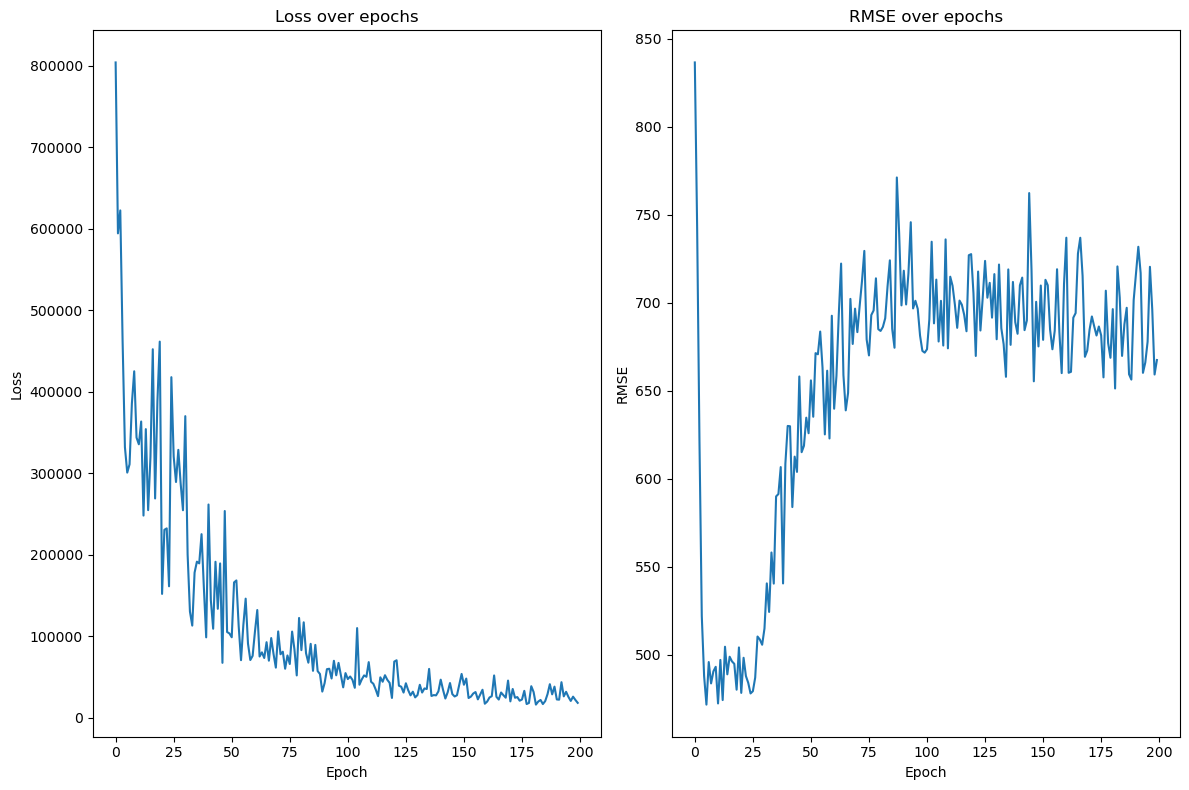

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

features = MVC[['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'hour']]
target = MVC['tripduration']
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.2, random_state=42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert the data into sequences
def create_sequences(input_data, target_data, seq_length):
    sequences = []
    target_sequences = []
    for i in range(len(input_data) - seq_length):
        seq = input_data[i:i+seq_length]
        # Using .iloc to access elements by position
        target_seq = target_data.iloc[i + seq_length]
        sequences.append(seq)
        target_sequences.append(target_seq)
    return np.array(sequences), np.array(target_sequences)

sequence_length = 5
X_train_seq, y_train_seq = create_sequences(X_train, y_train, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, sequence_length)

# Convert to tensors and move to the chosen device
X_train_seq = torch.tensor(X_train_seq, dtype=torch.float32).to(device)
y_train_seq = torch.tensor(y_train_seq, dtype=torch.float32).to(device).view(-1, 1)
X_test_seq = torch.tensor(X_test_seq, dtype=torch.float32).to(device)
y_test_seq = torch.tensor(y_test_seq, dtype=torch.float32).to(device).view(-1, 1)

# Create DataLoader instances
batch_size = 64
train_dataset = TensorDataset(X_train_seq, y_train_seq)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_seq, y_test_seq)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, dropout_rate=0.5):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.lstm2 = nn.LSTM(hidden_layer_size, hidden_layer_size, batch_first=True)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.linear1 = nn.Linear(hidden_layer_size, 64)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(64, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm1(x)
        lstm_out = self.dropout1(lstm_out)
        lstm_out, _ = self.lstm2(lstm_out)
        lstm_out = self.dropout2(lstm_out)
        lstm_out = lstm_out[:, -1, :]
        out = self.linear1(lstm_out)
        out = self.relu(out)
        predictions = self.linear2(out)
        return predictions

model = LSTMModel(input_size=5, hidden_layer_size=50, output_size=1, dropout_rate=0.5)
model.to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the LSTM model
# Evaluation on the test set
def evaluate(model, X_test_tensor, y_test_tensor):
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
        rmse_nn = torch.sqrt(criterion(y_pred_tensor, y_test_tensor.view(-1, 1)))
        return rmse_nn

# Training the model
epochs = 2000
losses = []
rmse_array = []
start_time = time()
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    # Save the loss and RMSE for plotting every 10 epochs
    if (epoch + 1) % 10 == 0:
        losses.append(loss.item())
        rmse_nn = evaluate(model, X_test_seq, y_test_seq)
        rmse_array.append(rmse_nn.item())
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
        print(f'RMSE: {rmse_nn.item():.4f}')
        print(f'Estimated remaining time: {(time() - start_time) * (epochs - epoch) / (epoch + 1)/60:.2f} minutes')


# Plot the loss and RMSE over epochs
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.subplot(1, 2, 2)
plt.plot(rmse_array)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over epochs')
plt.tight_layout()
plt.savefig(os.path.join('plots', 'lstm_pytorch.png'))
plt.show()

# Save the model
torch.save(model.state_dict(), 'lstm_pytorch_model.pth')


In [ ]:
MVC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 10376436 to 14863760
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             707 non-null    float64       
 1   starttime                707 non-null    datetime64[ns]
 2   stoptime                 707 non-null    datetime64[ns]
 3   start_station_id         707 non-null    float64       
 4   start_station_latitude   707 non-null    float64       
 5   start_station_longitude  707 non-null    float64       
 6   end_station_id           707 non-null    float64       
 7   end_station_latitude     707 non-null    float64       
 8   end_station_longitude    707 non-null    float64       
 9   bikeid                   707 non-null    int64         
 10  usertype                 707 non-null    object        
 11  birth_year               707 non-null    int64         
 12  gender                   707 

In [ ]:
# Convert start and stop times to datetime
MVC['starttime'] = pd.to_datetime(df['starttime'])
MVC['stoptime'] = pd.to_datetime(df['stoptime'])

# Extract hour and date from start and stop times
MVC['start_hour'] = MVC['starttime'].dt.hour
MVC['start_date'] = MVC['starttime'].dt.date
MVC['stop_hour'] = MVC['stoptime'].dt.hour
MVC['stop_date'] = MVC['stoptime'].dt.date

# Aggregate data by hour and station for pickups
hourly_pickups = MVC.groupby(['start_station_id', 'start_date', 'start_hour']).size().reset_index(name='pickups')

# Aggregate data by hour and station for drop-offs
hourly_dropoffs = MVC.groupby(['end_station_id', 'stop_date', 'stop_hour']).size().reset_index(name='dropoffs')

#Handling missing data
# Create a complete range of hours and dates for the dataset
all_hours = pd.date_range(df['starttime'].min(), df['stoptime'].max(), freq='H')
all_stations = MVC['start_station_id'].unique()

# Create a complete DataFrame of hours and stations
complete_data = pd.MultiIndex.from_product([all_stations, all_hours], names=['station_id', 'hour']).to_frame(index=False)

# Convert 'hour' to separate date and hour columns
complete_data['date'] = complete_data['hour'].dt.date
complete_data['hour'] = complete_data['hour'].dt.hour

# Now merge this with the actual data
complete_pickups = pd.merge(complete_data, hourly_pickups, how='left', left_on=['station_id', 'date', 'hour'], right_on=['start_station_id', 'start_date', 'start_hour'])
complete_dropoffs = pd.merge(complete_data, hourly_dropoffs, how='left', left_on=['station_id', 'date', 'hour'], right_on=['end_station_id', 'stop_date', 'stop_hour'])

# Fill missing values with 0
complete_pickups['pickups'].fillna(0, inplace=True)
complete_dropoffs['dropoffs'].fillna(0, inplace=True)
# Merge the pickups and dropoffs data
hourly_data = pd.merge(complete_pickups[['station_id', 'date', 'hour', 'pickups']], complete_dropoffs[['station_id', 'date', 'hour', 'dropoffs']], on=['station_id', 'date', 'hour'])

In [ ]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349680 entries, 0 to 349679
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   station_id  349680 non-null  float64
 1   date        349680 non-null  object 
 2   hour        349680 non-null  int32  
 3   pickups     349680 non-null  float64
 4   dropoffs    349680 non-null  float64
dtypes: float64(3), int32(1), object(1)
memory usage: 12.0+ MB


/tmp/ipykernel_74693/1915966445.py:24: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_74693/1915966445.py:25: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_74693/1915966445.py:26: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_74693/1915966445.py:27: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Training the model...
Epoch [10/2000], Loss: 641801.6875
RMSE: 859.7407
Estimated remaining time: 1.14 minutes
Epoch [10/2000], Loss: 675808.2500
RMSE: 859.7462
Estimated remaining time: 1.15 minutes
Epoch [10/2000], Loss: 914604.0000
RMSE: 859.6310
Estimated remaining time: 1.16 minutes
Epoch [10/2000], Loss: 1093142.1250
RMSE: 859.5175
Estimated remaining time: 1.18 minutes
Epoch [10/2000], Loss: 826224.2500
RMSE: 859.5147
Estimated remaining time: 1.19 minutes
Epoch [10/2000], Loss: 1096893.3750
RMSE: 859.6580
Estimated remaining time: 1.20 minutes
Epoch [10/2000], Loss: 910824.3125
RMSE: 859.4238
Estimated remaining time: 1.21 minutes
Epoch [10/2000], Loss: 832297.8125
RMSE: 859.1511
Estimated remaining time: 1.23 minutes
Epoch [10/2000], Loss: 1096321.0000
RMSE: 859.1737
Estimated remaining time: 1.24 minutes
Epoch [20/2000], Loss: 905527.5625
RMSE: 854.0672
Estimated remaining time: 1.13 minutes
Epoch [20/2000], Loss: 891889.8750
RMSE: 854.2327
Estimated remaining time: 1.14 minu

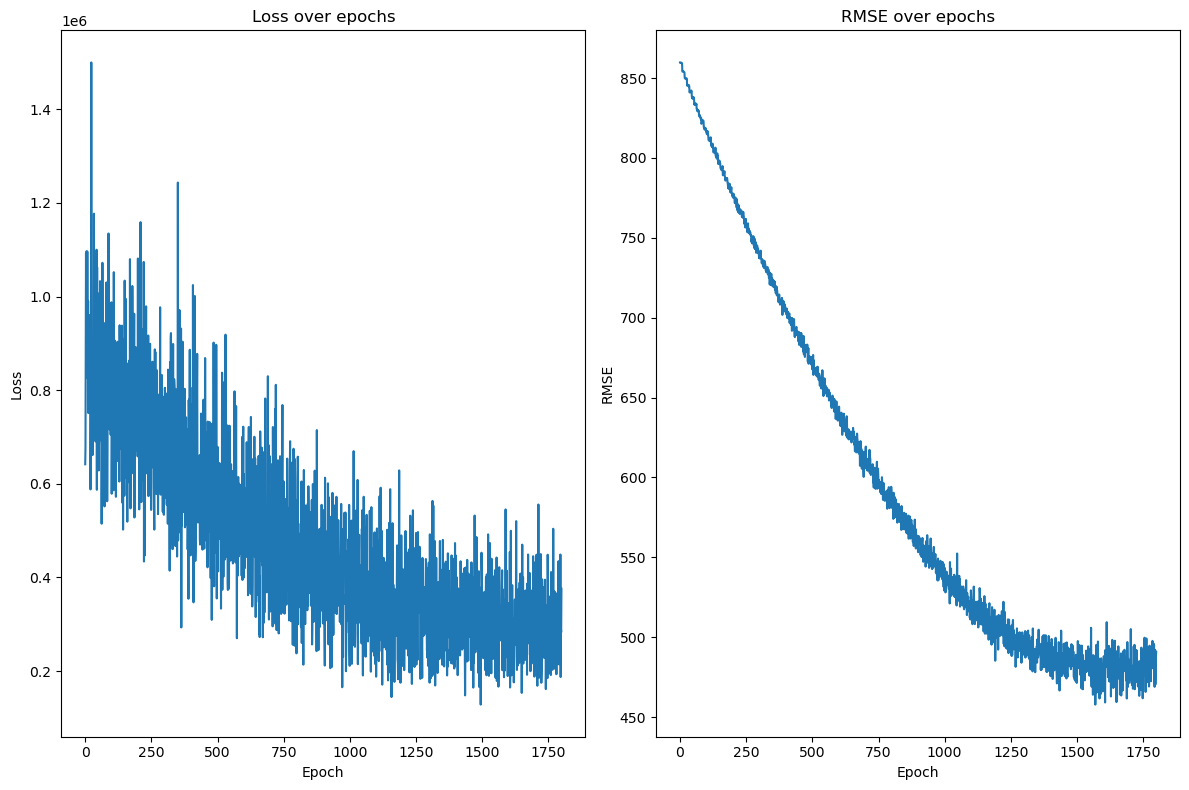

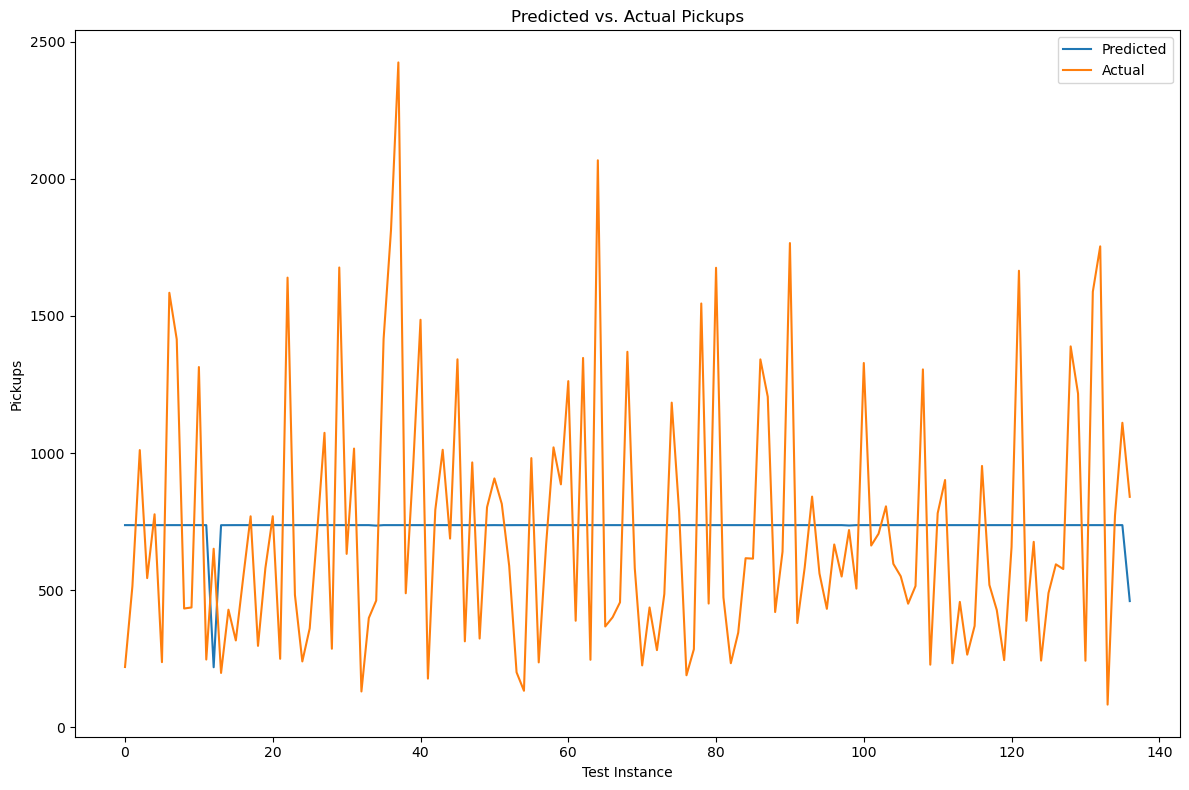

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import torch.nn as nn
import torch.optim as optim

# Prepare the data
features = hourly_data[['station_id', 'date', 'hour']]
target = hourly_data['pickups']

# Convert categorical features to one-hot encoding
features_encoded = pd.get_dummies(features, columns=['station_id', 'date', 'hour'])

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_standardized, target, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_seq, dtype=torch.float32).to(device).view(-1, 1)
X_test_tensor = torch.tensor(X_test_seq, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test_seq, dtype=torch.float32).to(device).view(-1, 1)


# Create DataLoader instances
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size, dropout_rate=0.5):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = self.dropout(lstm_out[:, -1, :])
        predictions = self.linear(lstm_out)
        return predictions

# Set the hyperparameters
input_size = X_train.shape[1]
hidden_layer_size = 50
output_size = 1
dropout_rate = 0.5
learning_rate = 0.001
epochs = 2000

# Create the LSTM model
model = LSTMModel(input_size, hidden_layer_size, output_size, dropout_rate)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

rmse_array = []
start_time = time()
losses = []
# Evaluation on the test set
def evaluate(model, X_test_tensor, y_test_tensor):
    with torch.no_grad():
        y_pred_tensor = model(X_test_tensor)
        rmse_nn = torch.sqrt(criterion(y_pred_tensor, y_test_tensor.view(-1, 1)))
        return rmse_nn

# Training the LSTM model
print('Training the model...')
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.view(-1, 1))
        loss.backward()
        optimizer.step()

    # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
            rmse_nn = evaluate(model, X_test_tensor, y_test_tensor)
            losses.append(loss.item())
            rmse_array.append(rmse_nn.item())
            print(f'RMSE: {rmse_nn.item():.4f}')
            print(f'Estimated remaining time: {(time() - start_time) * (epochs - epoch) / (epoch + 1)/60:.2f} minutes')

# Plot the loss and RMSE over epochs
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.subplot(1, 2, 2)
plt.plot(rmse_array)
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE over epochs')
plt.tight_layout()
plt.savefig(os.path.join('plots', 'lstm_pytorch_pickups.png'))
plt.show()

# Save the model
torch.save(model.state_dict(), 'lstm_pytorch_pickups_model.pth')

# Plot the predictions vs. actual
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.cpu().numpy()
    y_test = y_test_tensor.cpu().numpy()
    plt.figure(figsize=(12, 8))
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual')
    plt.xlabel('Test Instance')
    plt.ylabel('Pickups')
    plt.title('Predicted vs. Actual Pickups')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join('plots', 'lstm_pytorch_pickups_predictions.png'))
    plt.show()

print('Finished!')
